# Possible objective functions of the Blahut-Arimoto algorithm

$\renewcommand{\prior}{\textcolor{green}{p(\theta)}}$
$\renewcommand{\KL}[2]{D_{KL}\left[#1 \;\mid\mid\; #2 \right]}$

## 1. Static objective

The simple MI between a latent parameter and a finite set of $n$ observations, using a fixed likelihood $p_{\cdot \mid \theta} = \textcolor{green}{p(\cdot \mid \theta)}$

$p^*(\theta \mid n, p_{x \mid \theta}) = \argmax_{p(\theta)} \mathcal{L}_{stat} = \argmax_{p(\theta)} I(\theta, X)$

with the following notation:
- $\theta \in \Theta$
- $\theta \sim p(\theta)$
- $X = \lbrace x_1 \ldots x_n \rbrace$
- $x \in \mathcal{X}$
- $x \sim p(x) = \sum_{\theta \in \Theta} p(x \mid \theta) p(\theta)$
- $X \in \mathcal{X}^n$
- $p(X \mid \theta) = \prod_{i=1}^n p(x_i \mid \theta)$
- $X \sim p(X) = \sum_{\theta \in \Theta} p(X \mid \theta) p(\theta) = \sum_{\theta \in \Theta} p(\theta) \prod_{i=1}^n p(x_i \mid \theta)$

so the objective is given as:

$\mathcal{L}_{stat} = \sum_{\theta \in \Theta} \sum_{X \in \mathcal{X}^n} p(\theta, X) \log \frac{p(\theta, X)}{p(\theta)p(X)} = \sum_{\theta \in \Theta} p(\theta) \sum_{X \in \mathcal{X}^n} p(X \mid \theta) \log \frac{p(X \mid \theta)}{p(X)}$

### Blahut-Arimoto updates 

from Eq. S4 of Mattingly, H. H., Transtrum, M. K., Abbott, M. C., & Machta, B. B. (2018). Maximizing the information learned from finite data selects a simple model. Proceedings of the National Academy of Sciences, 115(8), 1760-1765.

$p_{\tau+1}(\theta) = \frac{1}{Z_\tau} e^{\KL{p(X \mid \theta)}{p(X)}} p_\tau(\theta)$

$Z_\tau = \sum_{\theta \in \Theta} e^{\KL{p(X \mid \theta)}{p(X)}} p_\tau(\theta)$

with the KL divergence being:

$\KL{p(X \mid \theta)}{p(X)} = \sum_{X \in \mathcal{X}^n} p(X \mid \theta) \log \frac{p(X \mid \theta)}{p(X)}$

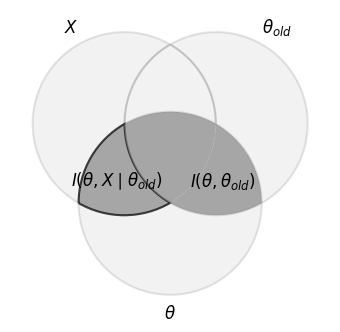

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def create_custom_monochrome_venn_diagram(
    subsets_data: tuple,
    set_names: tuple = ('Set A', 'Set B', 'Set C'),
    section_labels: dict = None,
    shaded_sections: list = None,
    fill_color: str = 'black',
    alpha_shaded: float = 0.5,
    alpha_unshaded: float = 0.1,
    border_color: str = 'black',
    border_linewidth: float = 1.0
):
    if section_labels is None:
        section_labels = {}
    if shaded_sections is None:
        shaded_sections = []

    plt.figure(figsize=(5, 4))

    # Create the Venn diagram.
    v = venn3(subsets=subsets_data, set_labels=set_names)

    # --- Customize the appearance of each patch (section) ---
    for subset_id in ['100', '010', '110', '001', '101', '011', '111']:
        patch = v.get_patch_by_id(subset_id)
        if patch:
            patch.set_color(fill_color)
            if subset_id in shaded_sections:
                patch.set_alpha(alpha_shaded)
            else:
                patch.set_alpha(alpha_unshaded)         
            patch.set_edgecolor(border_color)
            if subset_id in ['011', '111']:
                patch.set_linewidth(0)
            else:
                patch.set_linewidth(border_linewidth)
            # Ensure the border is visible even for unshaded sections
            patch.set_linestyle('-')

    # --- Customize the text labels within each section ---
    for subset_id in ['100', '010', '110', '001', '101', '011', '111']:
        text_element = v.get_label_by_id(subset_id)
        if text_element:
            # Check if a custom label is provided for this section
            if subset_id in section_labels:
                text_element.set_text(section_labels[subset_id])
                text_element.set_color('black') # Ensure visibility
                text_element.set_fontsize(12)
            else:
                # If no custom label, keep the default count but ensure it's black
                text_element.set_color('black')
                text_element.set_fontsize(12)

if __name__ == '__main__':
    # 1. Define your subset sizes
    # (A, B, AB, C, AC, BC, ABC)
    circle_size = 6
    my_subsets = (circle_size, circle_size, 5, circle_size, 5, 5, 2)

    # 2. Define custom labels for specific sections
    my_section_labels = {
        '100': '',        # A only
        '010': '',        # B only
        '110': '',        # A and B intersection (excluding C)
        '001': '',        # C only
        '101': '$I(\\theta, X \mid \\theta_{old})$', # A and C intersection (excluding B)
        '011': '$I(\\theta, \\theta_{old})$', # B and C intersection (excluding A)
        '111': ''               # A, B, C intersection
    }

    # 3. Specify which sections to shade
    sections_to_shade = ['101', '011', '111']

    # 4. Call the function to create the diagram
    create_custom_monochrome_venn_diagram(
        subsets_data=my_subsets,
        set_names=('$X$', '$\\theta_{old}$', '$\\theta$'), # Custom names for the main sets
        section_labels=my_section_labels,
        shaded_sections=sections_to_shade,
        fill_color='gray',  # Use a gray fill for monochrome
        alpha_shaded=0.7,
        alpha_unshaded=0.1,
        border_color='black',
        border_linewidth=1.5
    )


## 2. Dynamic objective

In the case of trying to choose an optimal $p^*(\theta)$ repeatedly, we would want to maximise the MI between all past and future observations simultaneously. However, as individual past observations are not retained, all information about those is in the posterior distribution $p(\theta_{old} \mid X_{old})$, where $X_{old} \in \mathcal{X}^m$, estimated from $m$ observations, with the likelihood function remaining the same. The resulting MI maximisation is illustrated in the above Venn-diagram, and 

$p^*(\theta \mid n, p_{x \mid \theta}, X_{old}) = \argmax_{p(\theta)} \mathcal{L}_{dyn} = \argmax_{p(\theta)} I(\theta, \theta_{old}) + I(\theta, X \mid \theta_{old})$

### Projecting the posterior into observation space

For this objective to be completely defined, we'd need $p(\theta, \theta_{old} \mid n, m)$ to be defined. We'd like to avoid giving such a definition for now, and sidestep the problem by introducing a variable for synthetic observations, and assume it to be connected to the latent via the same likelihood function we used so far:

$\tilde{x} \sim p(\tilde{x}) = \sum_{\theta_{old} \in \Theta} p(\tilde{x} \mid \theta_{old}) p(\theta_{old} \mid X_{old})$

Then we make the following equivocation in the objective function, making it completely defined, albeit not in a way that makes the balancing effect of $n$ and $m$ explicit, to which we will come back later:

$\mathcal{L}_{dyn} = \argmax_{p(\theta)} I(\theta, \tilde{x}) + I(\theta, X \mid \tilde{x})$

### The future term

The conditional term is slightly easier to handle, so let's look at that first:

$I(\theta, X \mid \tilde{x}) = \sum_{\tilde{x} \in \mathcal{X}} p(\tilde{x}) \sum_{\theta \in \Theta} p(\theta \mid \tilde{x}) \sum_{X \in \mathcal{X}^n} p(X \mid \theta, \tilde{x}) \log \frac{p(X \mid \theta, \tilde{x})}{p(X \mid \tilde{x})}$

Here we observe that $\theta$ is a Markov blanket between $X$ and $\tilde{x}$, thus $p(X \mid \theta, \tilde{x}) = p(X \mid \theta)$ and $p(X \mid \tilde{x}) = \sum_{\theta \in \Theta} p(X \mid \theta, \tilde{x}) p(\theta) = p(X)$.

Then we expand the conditional: 

$p(\theta \mid \tilde{x}) = \frac{p(\tilde{x} \mid \theta) p(\theta)}{\sum_{\theta \in \Theta} p(\tilde{x} \mid \theta) p(\theta)}$

Then introduce the shorthand $p_{new}(\tilde{x}) = \sum_{\theta \in \Theta} p(\tilde{x} \mid \theta) p(\theta)$, so the conditional MI becomes:

$I(\theta, X \mid \tilde{x}) = \sum_{\tilde{x} \in \mathcal{X}} p(\tilde{x}) \sum_{\theta \in \Theta} \frac{p(\tilde{x} \mid \theta)}{p_{new}(\tilde{x})} p(\theta) \sum_{X \in \mathcal{X}^n} p(X \mid \theta) \log \frac{p(X \mid \theta)}{p(X)}$

### The sampling trick

At this point we'd like to reintroduce the consideration that $m$ (or at least the ratio between it and $n$) should play a role in how much information do we actually copy from the posterior into the new prior. We do this by taking $m$ samples from $p(\tilde{x})$, and calculate the expectation using those:

$\tilde{x}_1 \ldots \tilde{x}_m \sim p(\tilde{x})$

$I(\theta, X \mid \tilde{x}) \approx \sum_{s=1}^m \sum_{\theta \in \Theta} \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)} p(\theta) \sum_{X \in \mathcal{X}^n} p(X \mid \theta) \log \frac{p(X \mid \theta)}{p(X)} = 
\sum_{\theta \in \Theta} p(\theta) \left[ \sum_{s=1}^m \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)} \right]  \sum_{X \in \mathcal{X}^n} p(X \mid \theta) \log \frac{p(X \mid \theta)}{p(X)}$

This approximation can be done fully stochastically as stated here, or if we retained any real observations in episodic memory, we can use those as well.

### The past term

In order to be able to use the same set of samples for approximation, we expand the non-conditional term in the less intuitive way:

$I(\theta, \tilde{x}) =  \sum_{\tilde{x} \in \mathcal{X}} p(\tilde{x}) \sum_{\theta \in \Theta} p(\theta \mid \tilde{x}) \log \frac{p(\theta \mid \tilde{x})}{p(\theta)} = 
\sum_{\tilde{x} \in \mathcal{X}} p(\tilde{x}) \sum_{\theta \in \Theta} \frac{p(\tilde{x} \mid \theta) p(\theta)}{p_{new}(\tilde{x})} \log \frac{p(\tilde{x} \mid \theta)}{p_{new}(\tilde{x})}$

Then using the samples this becomes:

$I(\theta, \tilde{x}) \approx  \sum_{\theta \in \Theta} p(\theta) \sum_{s=1}^m \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)}  \log \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)}$

### The full objective

$\mathcal{L}_{dyn} \approx \argmax_{p(\theta)} \sum_{\theta \in \Theta} p(\theta) \sum_{s=1}^m  \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)}  \left[ \log \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)} + \sum_{X \in \mathcal{X}^n} p(X \mid \theta) \log \frac{p(X \mid \theta)}{p(X)} \right]$

### Blahut-Arimoto updates

since $I(\theta,  \left[X, \tilde{x} \right]) = \sum_{\theta \in \Theta} p(\theta) \KL{p(X, \tilde{x} \mid \theta)}{p(X, \tilde{x})}$, from the above it is obvious that 

$\KL{p(X, \tilde{x} \mid \theta)}{p(X, \tilde{x})} = \sum_{s=1}^m  \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)}  \left[ \log \frac{p(\tilde{x}_s \mid \theta)}{p_{new}(\tilde{x}_s)} + \sum_{X \in \mathcal{X}^n} p(X \mid \theta) \log \frac{p(X \mid \theta)}{p(X)} \right]$

this can be used to implement a Blahut-Arimoto iteration to find $p^*(\theta \mid n, p_{x \mid \theta}, X_{old})$ similarly to the static case:

$p_{\tau+1}(\theta) = \frac{1}{Z_\tau} e^{\KL{p(X, \tilde{x} \mid \theta)}{p(X, \tilde{x})}} p_\tau(\theta)$

$Z_\tau = \sum_{\theta \in \Theta} e^{\KL{p(X, \tilde{x} \mid \theta)}{p(X, \tilde{x})}} p_\tau(\theta)$

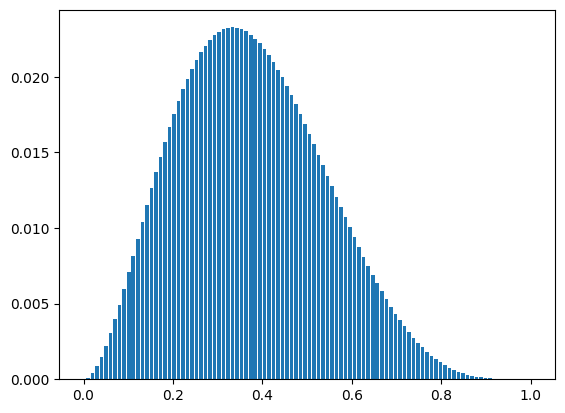

In [252]:
import importlib, sys
from infomax_class import biased_coin_GM
importlib.reload(sys.modules['infomax_class'])

gm = biased_coin_GM()
gm.set_prior(prob_densities=np.ones(100)/100)
posterior = gm.posterior([1, 0, 0, 0, 0, 1])
#gm.mutual_information(5, posterior=posterior, M=5)
#p = gm.KL_divergences(2, posterior=posterior, M=2))

#posterior = gm.posterior([0, 1, 0, 0])
posterior.plot()

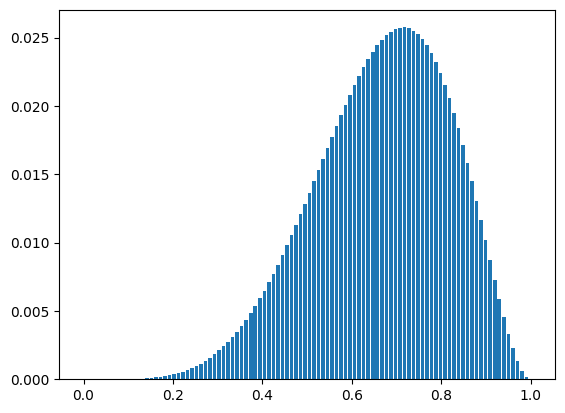

In [253]:
posterior = gm.posterior([1, 1, 1, 0, 0, 1, 1])
posterior.plot()

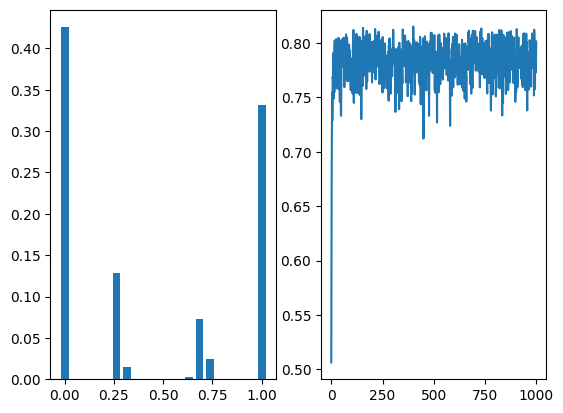

In [249]:
gm.blahut_arimoto_prior(7, 20, 1000, posterior=posterior, M=100, min_delta=1e-7, plot=True)
#gm.blahut_arimoto_prior(2, 5, 1000, min_delta=1e-7, plot=False)
#gm.prior.plot()

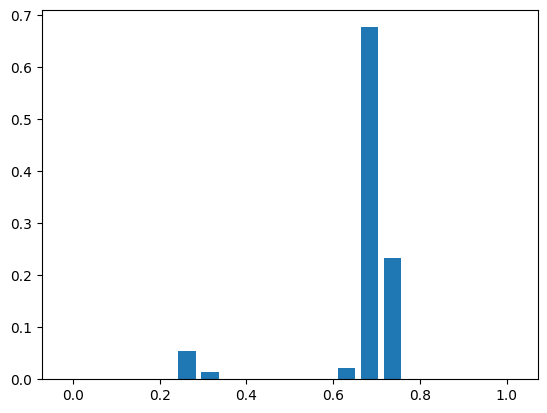

In [251]:
posterior = gm.posterior([1, 1, 1, 0, 0, 1, 1])
posterior.plot()